

# Project: Investigate a Dataset TMDb movie data

#### The goal of project two is to do the data analysis process using Pandas, NumPy and Matplotlib libraries. 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I chose TMDb movie dataset to make my project. After few investigation in the dataset. 
###  TMDb movie dataset
> This dataset contains 10866 rows and 21 columns

> It has a lot of null and zero values

### Questions
> 1- Which movie has the highest profit and the lowest ?

> 2-  Which movies has the highest profit ?

> 3- What is the most vote average with most vote count ?

> 4- What is the length that most of popularity prefer ?
 
> 5- What is the most popular titles ?




In [19]:
# Here I'm importing necessaries libraries to do this project 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

>For my analysis, I explored the dataset to check missing data then cleaned the data by dropping not important columns that not be used and null values.

### General Properties

In [20]:
# Here I did some accessing to the file
# First, I loaded the file and print shape to look for how many rows and columns in this dataset
# with `head` function to check the data of first three rows in this dataset
# Below `tail` function used to the check the last three rows

df = pd.read_csv('tmdb-movies.csv')
print(df.shape)
df.head(3)

(10866, 21)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [21]:
df.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [22]:
# Here `info` function used to check null values, the names of culomns and the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [23]:
# This function gives a summary statistics of numeric data 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>There are zero budgets ! which is something not logically correct.

In [24]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [25]:
df.duplicated().sum()

1

> * There are a lot of null values and most of them not important to my analysis
> * Only one duplicate which is good 



### Data Cleaning 
> * Duplicate values were dropped. 
> * Columns that not important to my analysis were dropped.

In [26]:
# Duplicates deleted and checked if it is deleted
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [27]:
# These are the columns that dropped from the dataset. They were not used in my analysis and I deleted them
df.drop(['imdb_id','homepage','tagline','keywords','overview','release_date','budget_adj','revenue_adj'] , axis=1,inplace=True)

In [28]:
# This code to delete all rows that had zero values due to they were not important to my analysis
# This code was found in stackoverflow website and referral link at the last of the report
df = df[~(df == 0).any(axis=1)]

In [29]:
# This code to check budget and revenue columns are not having zero values 
print(df.query('budget == 0').shape[0])
df.query('revenue == 0').shape[0]

0


0

In [30]:
# Saving to a new file 
df.to_csv('movie_data_cleaned.csv', index=False)

In [31]:
# Importing the new file to work on it and check the new columns and data
df_md = pd.read_csv('movie_data_cleaned.csv')
df_md.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015


<a id='eda'></a>
## Exploratory Data Analysis



In [32]:
# This code is to create a new column for the profit
df_md['profit'] = df_md['revenue'] - df_md['budget']

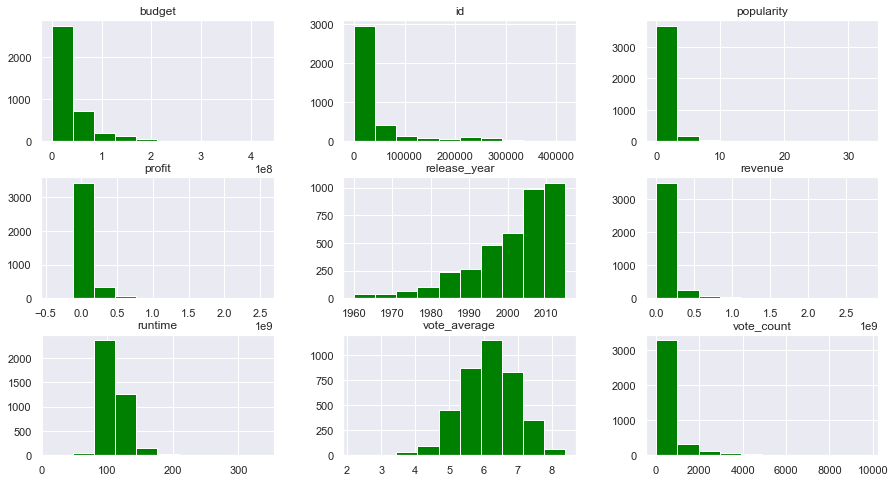

In [33]:
# This code to check approximate representation of the distribution of each numerical or categorical data in this dataset
df_md.hist(figsize=(15,8), color='green');

### Question 1
### Which movie has the highest profit and the lowest ?

In [34]:
# This function used to find maximum and minimum of the profit. This function referred from kaggle
# Referred link will be mentioned at the end of the report 

def find_minmax(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = df_md[x].idxmin()
    #use the function 'idmax' to find the index of Highest profit movie.
    max_index = df_md[x].idxmax()
    high = pd.DataFrame(df_md.loc[max_index,:])
    low = pd.DataFrame(df_md.loc[min_index,:])
    
    #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",df_md['original_title'][max_index])
    print("Movie Which Has Lowest "+ x + "  : ",df_md['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

#call the find_minmax function.
find_minmax('profit')

Movie Which Has Highest profit :  Avatar
Movie Which Has Lowest profit  :  The Warrior's Way


,344,682
id,19995,46528
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.


> Here you can see the two movies that has the highest profit and the lowest and all their information 

### Question 2
### Which movies has the highest profit ?

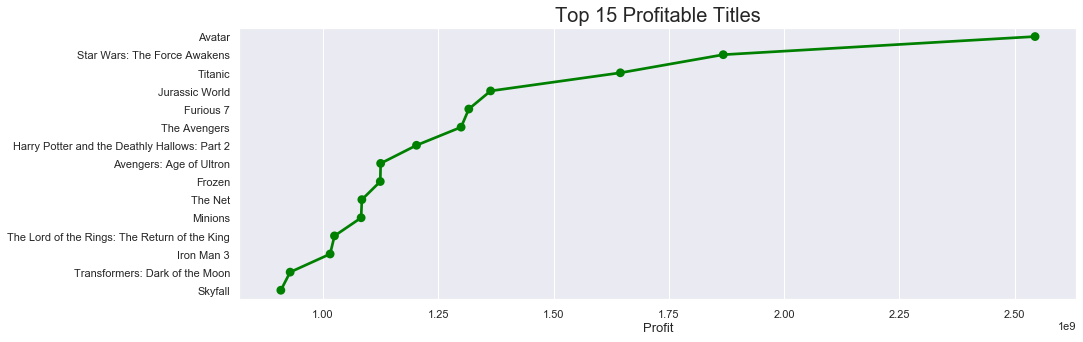

In [36]:
# Make a plot which contain top 15 movies which earn highest profit.
# Sort the 'profit' column in decending order and store it in the new dataframe
info_prof = pd.DataFrame(df_md['profit'].sort_values(ascending = False))
info_prof['original_title'] = df_md['original_title']
data_prof = list(map(str,(info_prof['original_title'])))
x = list(data_prof[:15])
y = list(info_prof['profit'][:15])
# Make a plot usinf pointplot for top 15 profitable movies.
ax = sns.pointplot(x=y,y=x, color='green')
# Setup the figure size
sns.set(rc={'figure.figsize':(15,5)})
# Setup the title and labels of the plot.
ax.set_title("Top 15 Profitable Titles",fontsize = 20)
ax.set_xlabel("Profit",fontsize = 13);

>Top 15 movies with the highest profits

### Question 3
### What is the most vote average with most vote count ?

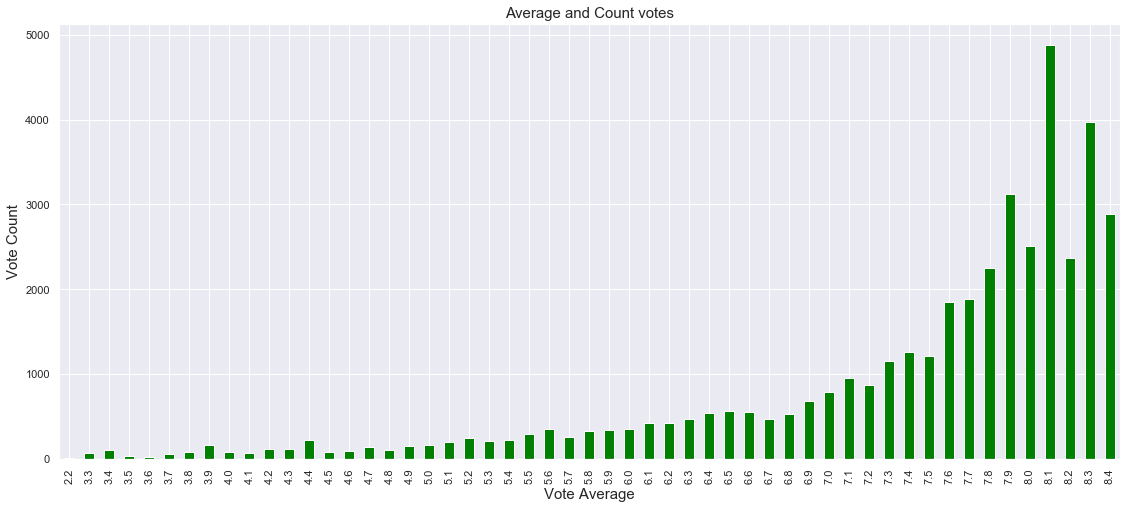

In [37]:
# Here vote rating with number of votes. x-axis for rating and y-axis for mean of number of votes
df_md.groupby('vote_average').vote_count.mean().plot(kind='bar', figsize=(19,8), color='green');
# Here using matplotlib to visualize the data
plt.title('Average and Count votes', fontsize=15)
plt.xlabel('Vote Average', fontsize= 15)
plt.ylabel('Vote Count', fontsize= 15);

> Most high rated had many votes. Low rated a had a few votes

### Question 4 
### What is the length that most of popularity prefer ?

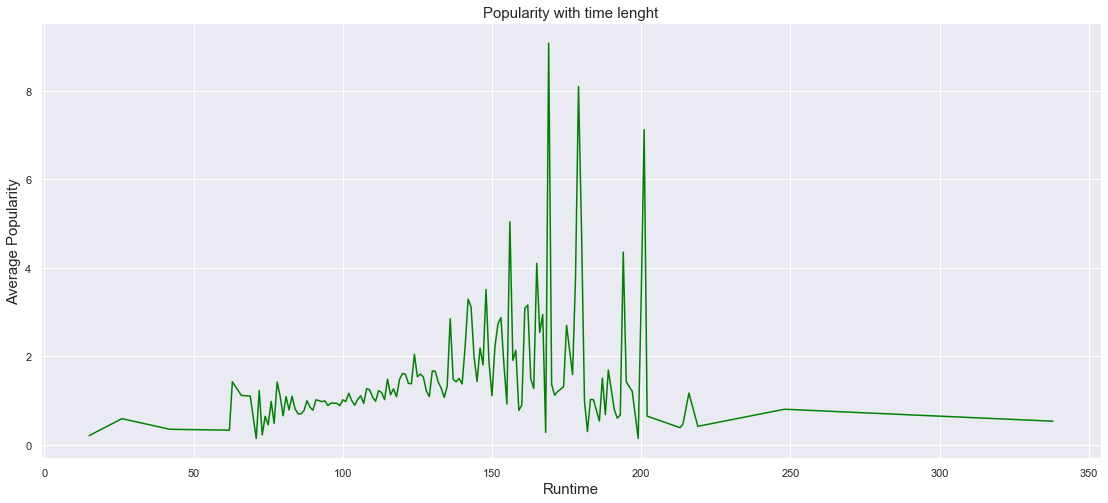

In [38]:
# Here I checked what were the length of time were most popular. 
# x-axis for the duration time and y-axis for the mean of popularity 
df.groupby('runtime')['popularity'].mean().plot(figsize = (19,8) ,color='green')
# Here using matplotlib to visualize the data
plt.title('Popularity with time lenght',fontsize = 15)
plt.xlabel('Runtime',fontsize = 15)
plt.ylabel('Average Popularity',fontsize = 15);

> You can see from line graph it is not recommended to make movies that more than 200 minutes and less than 150 minitues

### Question 5
### What is the most popular titles ?

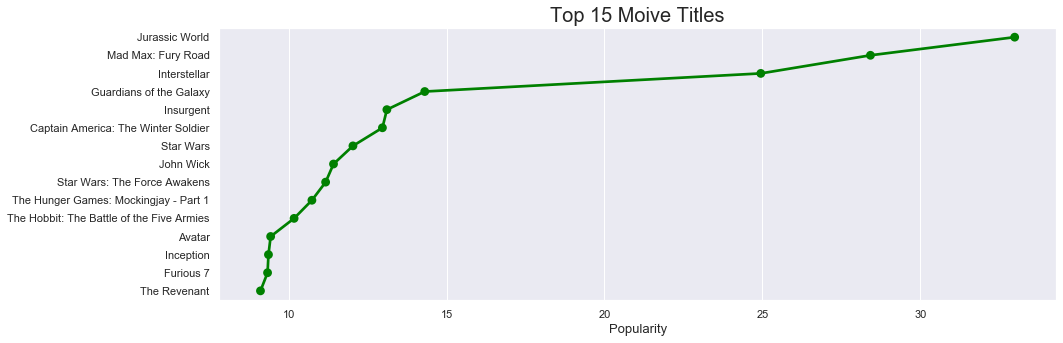

In [39]:
# Make a plot which contain top 15 popular titles.
# Sort the 'popularity' column in decending order and store it in the new dataframe
info_pu = pd.DataFrame(df_md['popularity'].sort_values(ascending = False))
info_pu['original_title'] = df_md['original_title']
data_pu = list(map(str,(info_pu['original_title'])))
x = list(data_pu[:15])
y = list(info_pu['popularity'][:15])
# Make a plot usinf pointplot for top 15 popular movies
ax = sns.pointplot(x=y,y=x, color='green')
# Setup the figure size
sns.set(rc={'figure.figsize':(15,5)})
# Setup the title and labels of the plot.
ax.set_title("Top 15 Moive Titles",fontsize = 20)
ax.set_xlabel("Popularity",fontsize = 13);

> You can see here the top 15 moive titles and there are three movies are very popular than the others

<a id='conclusions'></a>
## Conclusions

> * Avatar, Star Wars: The Force Awaknce and Titanic profits are more than 1.5 bilion
> * High rating votes are depends on numbers of voters
> * Most of popularity prefere length of moives between 150 minitus to 200 minutes 
> * The most three popular titles are Jurassic World, Mad Max: Fury Road and Interstellar 
> * Movies that has most profit not necessarily popular, like The Avengers movie

## limitations
> * This dataset has a lot of null and zero values that didn't help to make more accurate analysis, especially budget and revenue values.

## References

<ul>
<li><a href=https://stackoverflow.com/questions/27020312/drop-row-in-pandas-dataframe-if-any-value-in-the-row-equals-zero/27020744#27020744?newreg=d40216eba2cb4edfb29c2abfab503cb9>Dropping zero values from the dataset</a></li>
<li><a href=https://www.kaggle.com/deepak525/investigate-tmdb-movie-dataset/notebook#Investigate-a-Dataset-(TMDb-Movie-Data)
>The function used to calculate the profit</a></li>
</ul>


